The material is based on my workshop at Berkeley - [Machine learning with scikit-learn](https://github.com/qingkaikong/20170628_ML_sklearn). I convert it here so that there will be more explanation. Note that, the code is written using **Python 3.6**. It is better to read the slides I have first, which you can find it [here](http://qingkaikong.blogspot.com/2017/06/machine-learning-12-machine-learning.html). You can find the notebook on [Qingkai's Github](https://github.com/qingkaikong/blog/tree/master/2017_20_scikit-learn-4). 

This week, we will talk how to use scikit-learn for unsupervised learning, we will talk one example in dimensionality reduction and one in clustering. 

# Unsupervised learning

**Unsupervised Learning** addresses a different sort of problem. Here the data has no labels,
and we are interested in finding similarities between the objects in question. In a sense,
you can think of unsupervised learning as a means of discovering labels from the data itself.  

Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed before, we can use unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we'll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. 

## Dimensionality reduction with PCA

Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.
Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
print("The dataset shape:", X.shape)

X, y = iris.data, iris.target

The dataset shape: (150, 4)


Use PCA, we can reduce the dimensions from 4 into 2 and visualize it. 

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (150, 2)


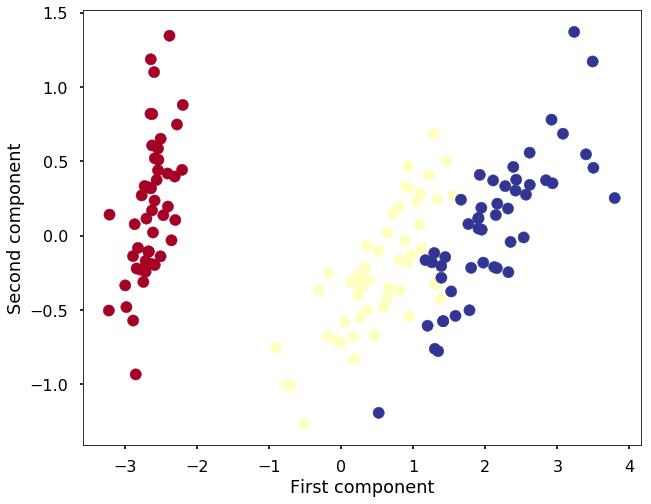

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='RdYlBu')
plt.xlabel('First component')
plt.ylabel('Second component')

## Clustering with K-means

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters we looked at previously - The Iris dataset. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

### Train K-means

In [5]:
from sklearn.cluster import KMeans

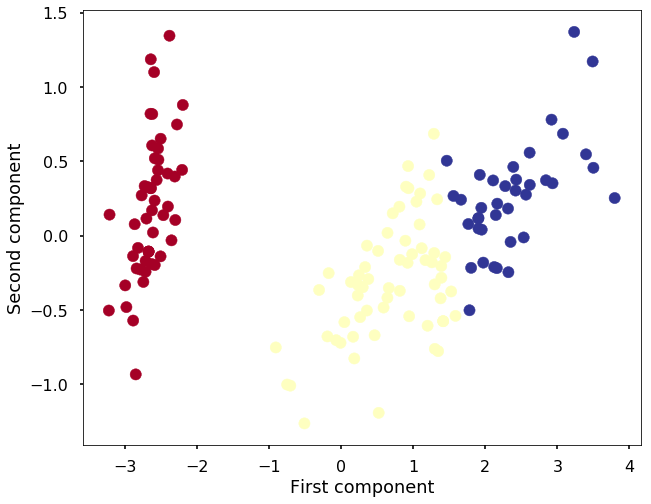

In [6]:
k_means = KMeans(n_clusters=3, random_state=2)
k_means.fit(X)
y_pred = k_means.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='RdYlBu')
plt.xlabel('First component')
plt.ylabel('Second component')

## Excercise

When we use PCA, visualization is just one purpose. Sometimes, we have high dimensional data that we want to use PCA to reduce the dimensionality while keep certain amount of information in the new PCA transformed data. 

In this exercise, please use PCA on the Iris data and keep the components that explained 95% of the variance of the original data. 

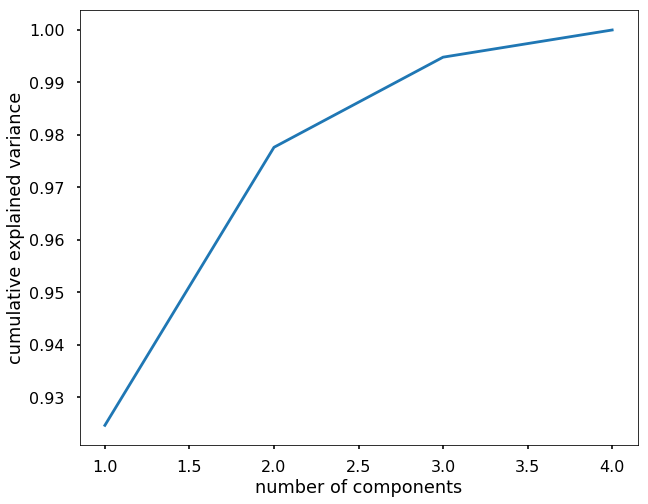

In [7]:
############################### Solution 1 #################################

# fit a PCA model
pca = PCA().fit(X)

plt.figure(figsize=(10,8))
plt.plot(range(1, X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# we can see that with the first two components, we can explain over 95% of the variance, 
# then we can train PCA with only 2 components
# fit a PCA model
pca = PCA(n_components = 2).fit(X)
X_reduced = pca.transform(X)

In [8]:
############################### Solution 2 #################################
## Or we can simplely use n_components = 0.95
pca = PCA(n_components = 0.95).fit(X)
X_reduced = pca.transform(X)